In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import os

In [2]:
test = pd.read_csv('Dataset/DigitRecognition/test.csv')
train_d = pd.read_csv('Dataset/DigitRecognition/train.csv')

In [3]:
def image_sample(l_data, index):
    data = l_data.drop('label', axis = 1)
    image = data.iloc[index].to_numpy()
    image = image.reshape((28,28))
    plt.figure(figsize=(3,3))
    plt.imshow(image,cmap='gray')
    plt.title(l_data.iloc[index, 0])
    plt.show()

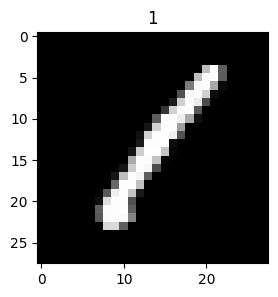

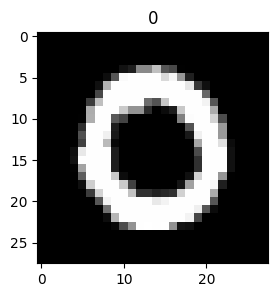

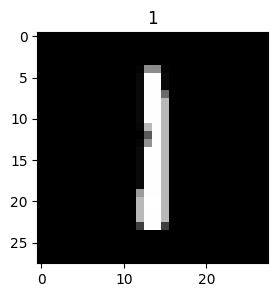

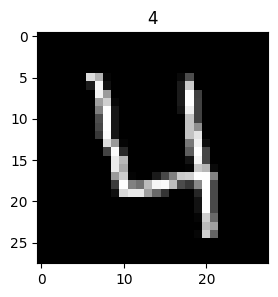

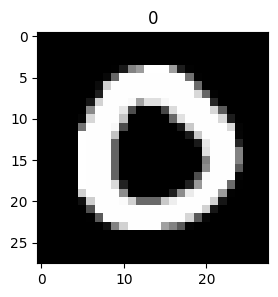

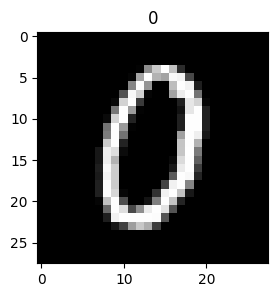

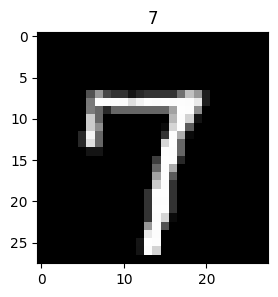

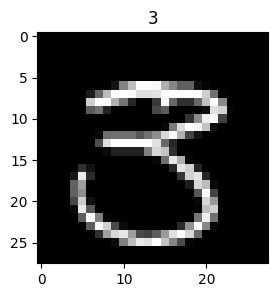

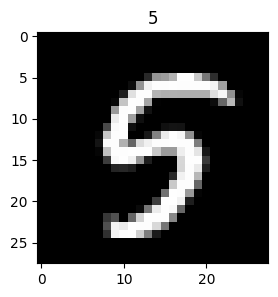

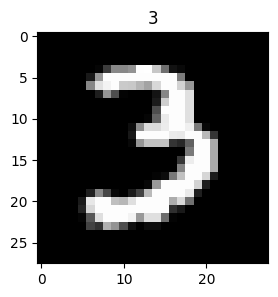

In [4]:
for i in range(10):    
    image_sample(train_d,i)

In [5]:
#img normalization
y_train = train_d['label']
x_train = train_d.drop('label', axis = 1).values / 255.0
test = test.values / 255.0

np.shape(test)

(28000, 784)

In [6]:
# Train test split
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

X_train = X_train.reshape(-1, 28, 28)
X_test = X_test.reshape(-1, 28, 28)
test = test.reshape(-1, 28, 28)
np.shape(test)

(28000, 28, 28)

In [7]:
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * np.exp(-0.1)

In [11]:
model = Sequential()

model = tf.keras.Sequential()
#Input layer
model.add(tf.keras.Input(shape=(28, 28, 1)))
model.add(layers.Conv2D(filters = 16,
                kernel_size = (5, 5),
                activation = "relu"))
model.add(layers.Dropout(rate=0.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters = 32,
                kernel_size = (2, 2),
                activation = "relu"))
model.add(layers.Conv2D(filters = 32,
                kernel_size = (2, 2),
                activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))       
#model.add(layers.Dense(32, activation = 'relu'))
#Output layer
model.add(layers.Dense(10, activation = "softmax"))

In [12]:
callback = keras.callbacks.LearningRateScheduler(scheduler)
model.summary()
model.compile(optimizer = "Adam",
             loss = "sparse_categorical_crossentropy",
             metrics = ["accuracy"])

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 24, 24, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 10, 10, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,571 (431.92 KB)

 Trainable params: 110,571 (431.92 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(X_train, Y_train, epochs = 20, verbose = 1, validation_data = (X_test, Y_test), validation_split=0.1, callbacks=[callback])

Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.8387 - loss: 0.4978 - val_accuracy: 0.9735 - val_loss: 0.0905 - learning_rate: 0.0010
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.9793 - loss: 0.0666 - val_accuracy: 0.9800 - val_loss: 0.0696 - learning_rate: 0.0010
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.9880 - loss: 0.0418 - val_accuracy: 0.9846 - val_loss: 0.0497 - learning_rate: 0.0010
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9880 - loss: 0.0373 - val_accuracy: 0.9854 - val_loss: 0.0472 - learning_rate: 0.0010
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.9922 - loss: 0.0251 - val_accuracy: 0.9865 - val_loss: 0.0429 - learning_rate: 0.0010
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.9916 - loss: 0.0231 - val_accuracy: 0.9890 - val_loss: 0.0344 - learning_rate: 0.0010
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accura

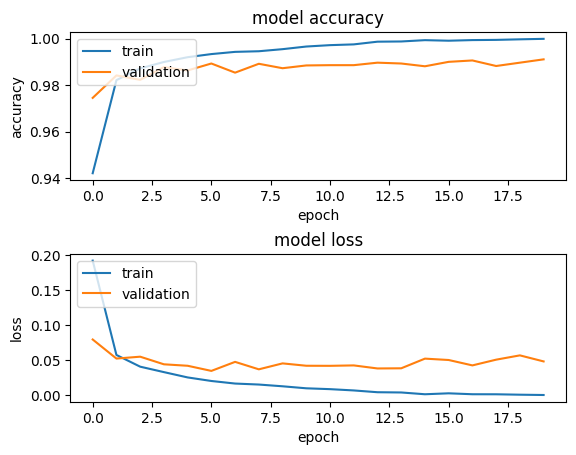

In [ ]:
fig = plt.figure()
plt1 = fig.add_subplot(2, 1, 1)
plt1.plot(history.history['accuracy'])
plt1.plot(history.history['val_accuracy'])
plt1.set_title('model accuracy')
plt1.set_ylabel('accuracy')
plt1.set_xlabel('epoch')
plt1.legend(['train', 'validation'], loc='upper left')
plt.subplots_adjust(hspace=0.5)

plt2 = fig.add_subplot(2, 1, 2)
plt2.plot(history.history['loss'])
plt2.plot(history.history['val_loss'])
plt2.set_title('model loss')
plt2.set_ylabel('loss')
plt2.set_xlabel('epoch')
plt2.legend(['train', 'validation'], loc='upper left')

In [ ]:
prediction = model.predict(test)
prediction = np.argmax(prediction, axis = 1)
print(prediction)

875/875 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step
[2 0 9 ... 3 9 2]


In [ ]:
submission = pd.DataFrame({
    'ImageId': range(1, len(prediction) + 1),
    'Label': prediction
})

submission.to_csv('submission.csv', index=False)
print(f"File saved as: {os.path.abspath('submission.csv')}")
print(submission.head())

File saved as: d:\Machinelearning\Projects\submission.csv
   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      9
4        5      3
